In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
transacoes = pd.read_csv('banvic_data/transacoes.csv', parse_dates=['data_transacao'])

In [132]:
transacoes['nome_transacao'].value_counts()

nome_transacao
Compra Crédito                      24977
Compra Débito                       17662
Pix - Realizado                     13164
Pix - Recebido                       5134
Depósito em espécie                  4866
Saque                                2879
TED - Recebido                       1005
Pagamento de boleto                   452
Transferência entre CC - Crédito      441
Estorno de Debito                     403
DOC - Recebido                        402
Transferência entre CC - Débito       303
TED - Realizado                       130
DOC - Realizado                        91
Pix Saque                              90
Name: count, dtype: int64

In [33]:
#criando a tabela de datas
date_range = pd.date_range(start='2010-01-01', end='2030-12-31', freq='D')
dim_dates = pd.DataFrame(date_range, columns=['Date'])

In [48]:
transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'], errors='coerce')

In [34]:
dim_dates['Year'] = dim_dates['Date'].dt.year
dim_dates['Month'] = dim_dates['Date'].dt.month
dim_dates['Day'] = dim_dates['Date'].dt.day
dim_dates['DayOfWeek'] = dim_dates['Date'].dt.dayofweek
dim_dates['DayOfWeekName'] = dim_dates['Date'].dt.day_name()
dim_dates['IsWeekend'] = dim_dates['DayOfWeek'].isin([5, 6])
dim_dates['Quarter'] = dim_dates['Date'].dt.quarter
dim_dates['MonthName'] = dim_dates['Date'].dt.strftime('%B')
dim_dates['WeekOfYear'] = dim_dates['Date'].dt.isocalendar().week
dim_dates['HalfOfMonth'] = dim_dates['Day'].apply(lambda x: 'Início do Mês' if x <= 15 else 'Final do Mês')

dim_dates.head()


,Date,Year,Month,Day,DayOfWeek,DayOfWeekName,IsWeekend,Quarter,MonthName,WeekOfYear,HalfOfMonth
0,2010-01-01,2010,1,1,4,Friday,False,1,January,53,Início do Mês
1,2010-01-02,2010,1,2,5,Saturday,True,1,January,53,Início do Mês
2,2010-01-03,2010,1,3,6,Sunday,True,1,January,53,Início do Mês
3,2010-01-04,2010,1,4,0,Monday,False,1,January,1,Início do Mês
4,2010-01-05,2010,1,5,1,Tuesday,False,1,January,1,Início do Mês


In [68]:
#Transformar em datetime
dim_dates['Date'] = pd.to_datetime(dim_dates['Date'])

In [76]:
print(transacoes.dtypes)

cod_transacao                    int64
num_conta                        int64
data_transacao     datetime64[ns, UTC]
nome_transacao                  object
valor_transacao                float64
dtype: object


In [126]:
# Calcular o volume de transações e valor movimentado por dia da semana
volume_transacoes_por_dia = transacoes.groupby(dim_dates['DayOfWeekName']).size().reset_index(name='VolumeTransacoes')
valor_movimentado_por_dia = transacoes.groupby(dim_dates['DayOfWeekName'])['valor_transacao'].sum().reset_index(name='ValorMovimentado')

print(volume_transacoes_por_dia)
print(valor_movimentado_por_dia)

  DayOfWeekName  VolumeTransacoes
0        Friday              1096
1        Monday              1096
2      Saturday              1096
3        Sunday              1096
4      Thursday              1095
5       Tuesday              1096
6     Wednesday              1095
  DayOfWeekName  ValorMovimentado
0        Friday        -146142.86
1        Monday        -145285.21
2      Saturday        -152973.40
3        Sunday        -127347.07
4      Thursday        -150548.05
5       Tuesday        -153749.66
6     Wednesday        -156572.27


               cod_transacao  num_conta  data_transacao  nome_transacao  \
DayOfWeekName                                                             
Friday                  1096       1096             913            1096   
Monday                  1096       1096             926            1096   
Saturday                1096       1096             920            1096   
Sunday                  1096       1096             918            1096   
Thursday                1095       1095             940            1095   
Tuesday                 1096       1096             918            1096   
Wednesday               1095       1095             908            1095   

               valor_transacao  
DayOfWeekName                   
Friday                    1096  
Monday                    1096  
Saturday                  1096  
Sunday                    1096  
Thursday                  1095  
Tuesday                   1096  
Wednesday                 1095  
DayOfWeekName
Friday      -

In [91]:
# Calcular o valor movimentado no início e final do mês
valor_movimentado_inicio_fim_mes = transacoes.groupby(dim_dates['HalfOfMonth'])['valor_transacao'].sum().reset_index(name='ValorMovimentado')

In [92]:
# Exibir os resultados
print(valor_movimentado_inicio_fim_mes)

     HalfOfMonth  ValorMovimentado
0   Final do Mês        -533088.07
1  Início do Mês        -499530.45


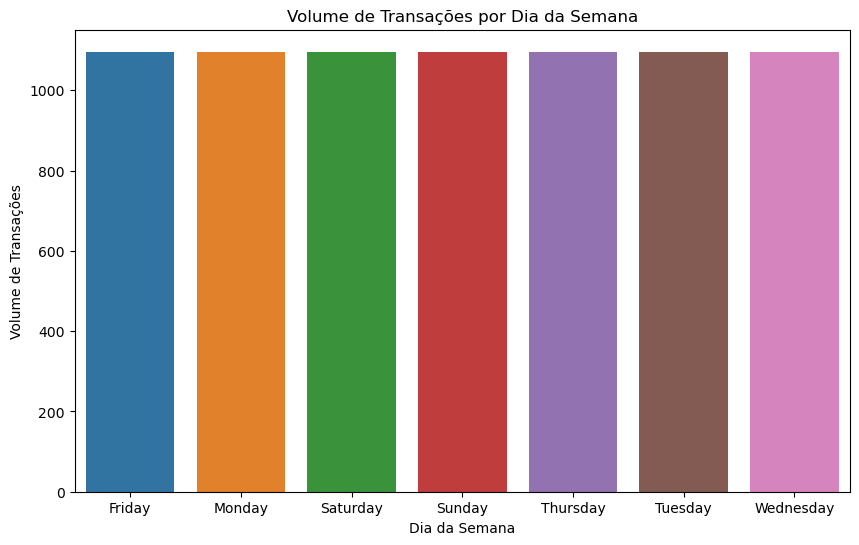

In [120]:
# Visualização do volume de transações por dia da semana
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeekName', y='VolumeTransacoes', data=volume_transacoes_por_dia)
plt.title('Volume de Transações por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Volume de Transações')
plt.show()


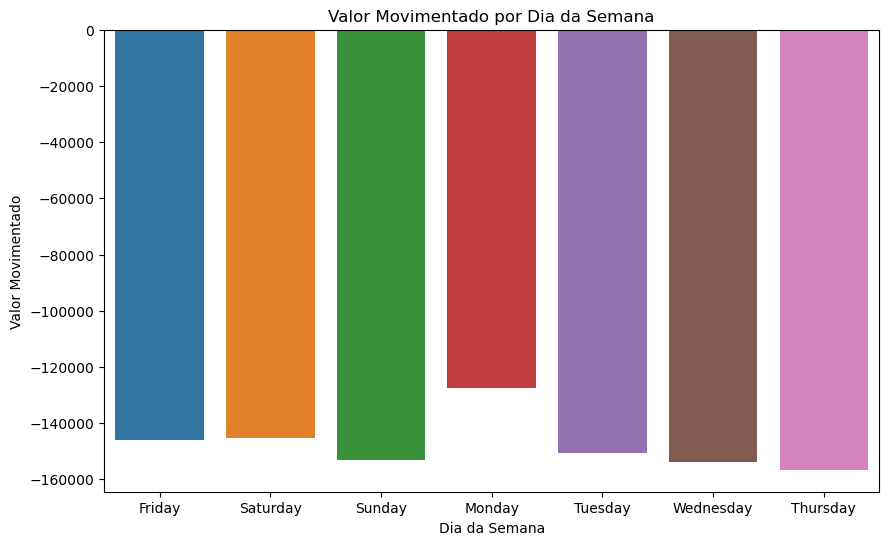

In [127]:
# Visualização do valor movimentado por dia da semana
plt.figure(figsize=(10, 6))
sns.barplot(x=dim_dates['DayOfWeekName'], y='ValorMovimentado', data=valor_movimentado_por_dia)
plt.title('Valor Movimentado por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Valor Movimentado')
plt.show()

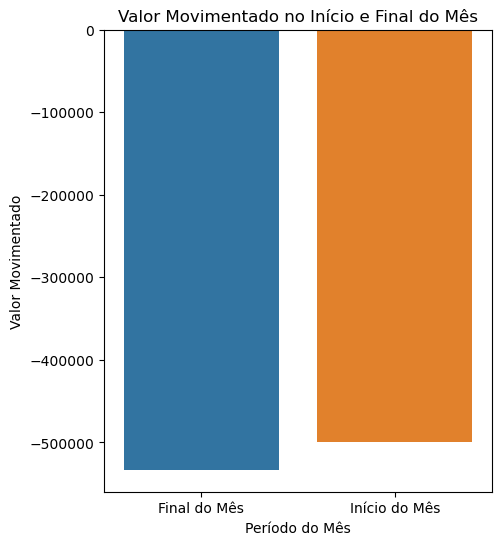

In [129]:
# Visualização do valor movimentado no início e final do mês
plt.figure(figsize=(5, 6))
sns.barplot(x='HalfOfMonth', y='ValorMovimentado', data=valor_movimentado_inicio_fim_mes)
plt.title('Valor Movimentado no Início e Final do Mês')
plt.xlabel('Período do Mês')
plt.ylabel('Valor Movimentado')
plt.show()